In [21]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
This was created from a Jupyter IPython notebook. To toggle code, click <a href="javascript:code_toggle()">here</a>.''')

# Statistics: The Science of Decisions Project

## Instructions

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color="red">RED</font>, <font color="blue">BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color="green">PURPLE</font>, <font color="purple">ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

1. What is our independent variable? What is our dependent variable?

2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

    * Now it’s your chance to try out the Stroop task for yourself. Go to [this link](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&ust=1474948330456000&usg=AFQjCNHEGnqvQuJ1bmbCTBgaFf2nMKgGyA), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download [this dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1474948330457000&usg=AFQjCNGq2LuYKEafNkWCEppk0UX6JR-6Pg) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.  

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

## Report

### Independent variable

The independent variable is whether the words are congruent or incongruent. Do the colors match the words or not?

### Dependent variable

The dependent variable is the time taken to name the colors for all the words in a list.

### Hypothesis
The brain is likely slower at processing the conflicting information from the incongruent words. The null hypothesis ($H_0$) is that the population mean for the time required for the incongruent word list ($\mathrm{\mu_i}$) is equal to the population mean for the time required for the congruent word list ($\mathrm{\mu_c}$). The alternative hypothesis ($H_1$) is that the population mean time for the incongruent word list is greater than the population mean time for the congruent word list.

Mathematically, the hypotheses are:  
$H_0:\, \mathrm{\mu_i} = \mathrm{\mu_c}$  
$H_1:\, \mathrm{\mu_i} > \mathrm{\mu_c}$

### Statistical test

The statistical test should be a one-tailed t-test, if the required assumptions hold. In this case, the assumptions for a t-test that are questionable are:

1. The data points are representative of the population.
2. The data sets and their differences are normally distributed.

It is not known how representative the data is of the population or even what was the population targeted by the sampling, based on the problem description. Without further information, I will consider assumption 1 to be true.

Determining whether the distributions of the data are close to normal requires plotting the data or normality tests. This is addressed later.

### Descriptive statistics

In [1]:
import pandas as pd

times = pd.read_csv('stroopdata.csv')

print 'Means:'
print times.mean()
print
print 'Medians:'
print times.median()
print
print 'Standard deviations:'
print times.std()

Means:
Congruent      14.051125
Incongruent    22.015917
dtype: float64

Medians:
Congruent      14.3565
Incongruent    21.0175
dtype: float64

Standard deviations:
Congruent      3.559358
Incongruent    4.797057
dtype: float64


The means and medians for the incongruent case are larger than for the congruent case. The medians are close to the means for both cases. This indicates that the distributions are not highly skewed. The variability in the incongruent times is larger than for the congruent times.

### Plots of distributions for test times for the congruent and incongruent cases

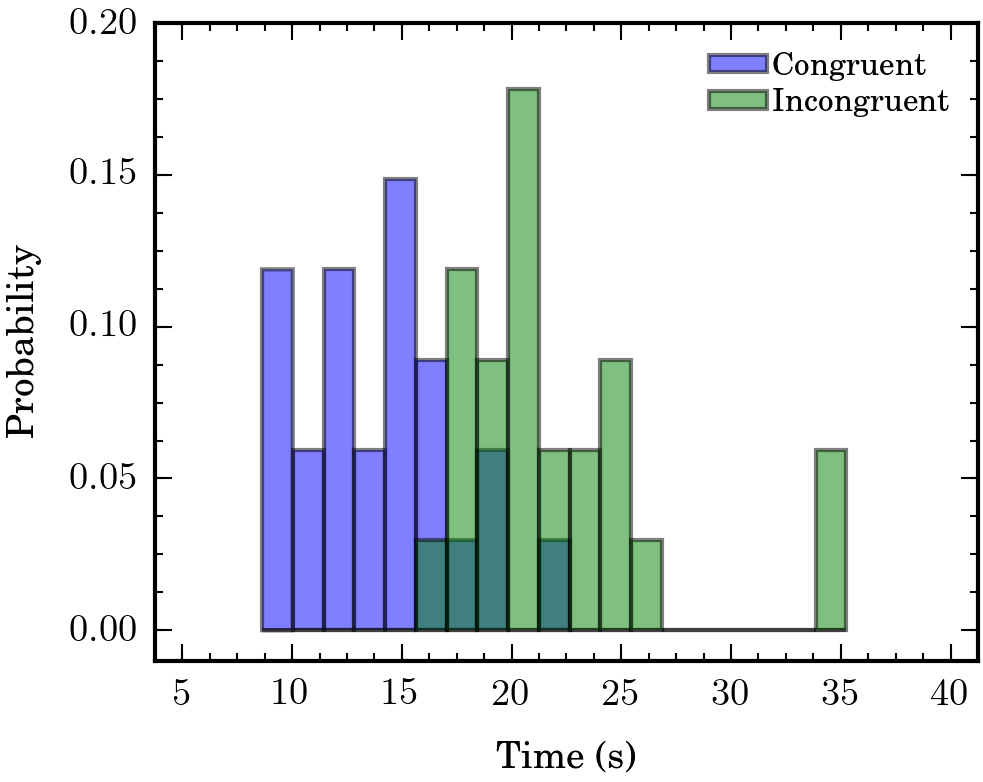

In [2]:
import matplotlib.pyplot as plt
import my_plot_settings_article as mpsa
import numpy as np
from IPython.display import Image, display

time_min = min([min(times['Congruent']), min(times['Incongruent'])])
time_max = max([max(times['Congruent']), max(times['Incongruent'])])

time_bins = np.linspace(time_min, time_max, 20)

plt.hist(times['Congruent'], bins=time_bins, normed=True, alpha=0.5,
        label='Congruent')
plt.hist(times['Incongruent'], bins=time_bins, normed=True, alpha=0.5,
        label='Incongruent')

mpsa.axis_setup('x')
mpsa.axis_setup('y')
plt.ylim(-0.01, 0.20)

plt.xlabel('Time (s)', labelpad=mpsa.axeslabelpad)
plt.ylabel('Probability', labelpad=mpsa.axeslabelpad)

plt.legend()

plt.savefig('histograms.png', bbox_inches='tight', pad_inches=0.02, dpi=300)
plt.close()

Image('histograms.png', width=500)

These are histograms of the data for the congruent and incongruent cases. They are normalized to give a probability instead of a count. The bin positions are the same for both histograms.

The congruent and incongruent distributions overlap some. Two people took much longer than the average time for the incongruent tasks, indicated by the isolated bar near 35 seconds. This calls into question the assumption of normality. Given that the sample size is small, this may not be a significant departure from normality. Of course, normality tests  or more data points would help resolve this issue. The t-test will be performed assuming any departures from normality only have a small effect.

### Plot of the distribution of the differences in test times between the congruent and incongruent cases

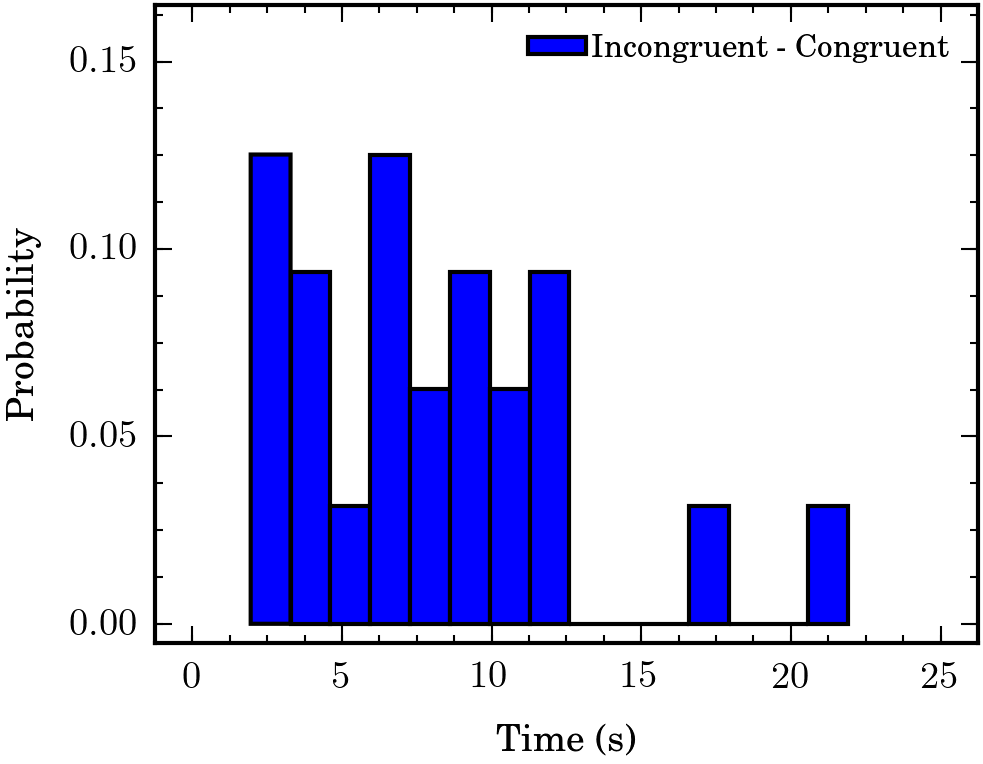

In [3]:
times_diff = times['Incongruent'] - times['Congruent']

plt.hist(times_diff, normed=True, bins=15, label='Incongruent - Congruent')

mpsa.axis_setup('x')
mpsa.axis_setup('y')

plt.xlabel('Time (s)', labelpad=mpsa.axeslabelpad)
plt.ylabel('Probability', labelpad=mpsa.axeslabelpad)

plt.legend()

plt.savefig('histogram_diff.png', bbox_inches='tight', pad_inches=0.02, 
            dpi=300)
plt.close()

Image('histogram_diff.png', width=500)

Again there is a question of normality, since for two people the difference in test times is much larger than the mean value.

### Statistical test

#### Mean difference between the incongruent and congruent times ($T_i - T_c$)

In [4]:
mn_diff = times_diff.mean()
print mn_diff

7.96479166667


#### Sample standard deviation of the time differences

In [5]:
std_diff = times_diff.std()
print std_diff

4.86482691036


#### Standard error for the mean time difference

In [6]:
n = times.shape[0]
se = std_diff/np.sqrt(n)
print se

0.993028634778


#### t-Statistic

In [7]:
t = mn_diff/se
print t

8.02070694411


#### t-Critical

In [8]:
import scipy.stats as stats

dof = n - 1
tcrit_5 = stats.t.isf(0.05, dof)
tcrit_1 = stats.t.isf(0.01, dof)

print 't-Critical for a 5% significance level: ' + str(tcrit_5)
print 't-Critical for a 1% significance level: ' + str(tcrit_1)

t-Critical for a 5% significance level: 1.71387152775
t-Critical for a 1% significance level: 2.49986673949


The inverse survival function (isf) is a faster and more accurate alternative to using the t-table.

#### p-value

In [9]:
p = stats.t.sf(t, dof)

The survival function is one minus the continuous distribution function. The arguments of the survival function are the calculated t-value and the degrees of freedom. In this case, the survival function gives the probability of the observed difference in the sample means occurring if the population means are actually equal. This probability is tiny. Thus, it is likely that the population mean for the incongruent test times is larger than the population mean for the congruent test times.


#### Decision

The t-statistic is much greater than the critical value for even a 1% significance level, and the p-value is on the order of 10<sup>-8</sup>. Thus, the decision is to reject the null hypothesis. The mean time needed for the incongruent word test appears to be larger than the mean time needed for the congruent word test, as expected.

The question of normality of the distributions of the test times and distribution of the differences in test times is likely not important given the low p-value from the t-test.

The large times for the incongruent tests might be outliers or the distribution of the incongruent times might be bimodal. The t-test was performed again without the times for those individuals:

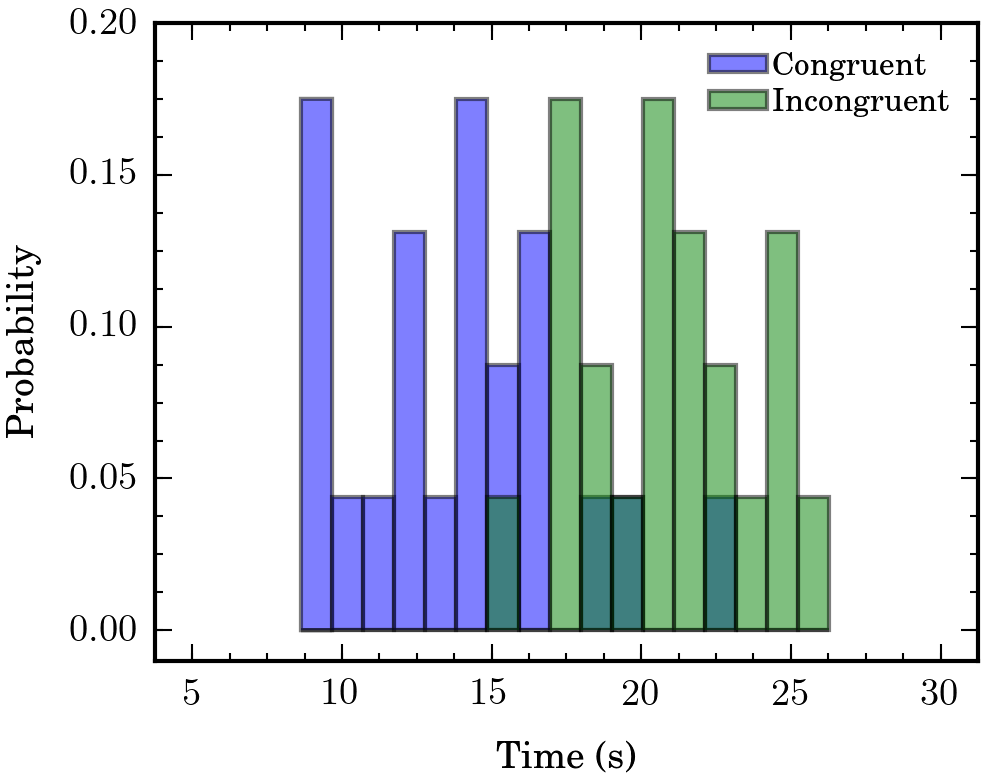

In [10]:
times2 = times[times['Incongruent'] < 30.0]

time_min = min([min(times2['Congruent']), min(times2['Incongruent'])])
time_max = max([max(times2['Congruent']), max(times2['Incongruent'])])

time_bins = np.linspace(time_min, time_max, 18)

plt.hist(times2['Congruent'], bins=time_bins, normed=True, alpha=0.5,
        label='Congruent')
plt.hist(times2['Incongruent'], bins=time_bins, normed=True, alpha=0.5,
        label='Incongruent')

mpsa.axis_setup('x')
mpsa.axis_setup('y')
plt.ylim(-0.01, 0.20)

plt.xlabel('Time (s)', labelpad=mpsa.axeslabelpad)
plt.ylabel('Probability', labelpad=mpsa.axeslabelpad)

plt.legend()

plt.savefig('histograms2.png', bbox_inches='tight', pad_inches=0.02, 
            dpi=300)
plt.close()

Image('histograms2.png', width=500)

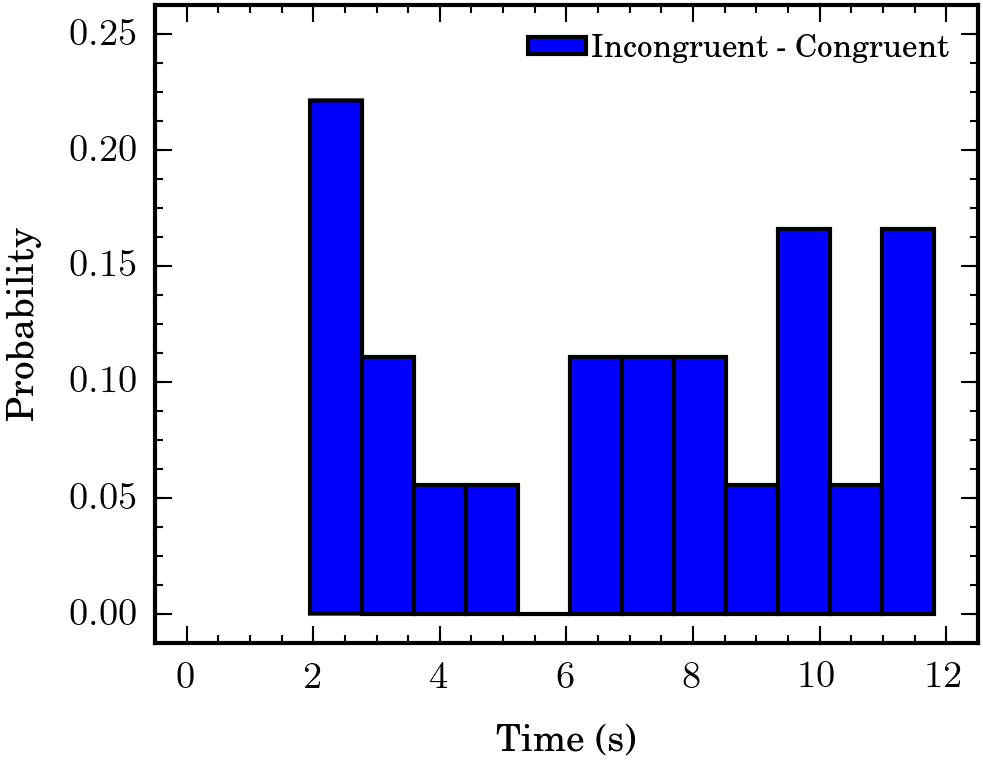

In [11]:
times_diff2 = times2['Incongruent'] - times2['Congruent']

plt.hist(times_diff2, normed=True, bins=12, label='Incongruent - Congruent')

mpsa.axis_setup('x')
mpsa.axis_setup('y')

plt.xlabel('Time (s)', labelpad=mpsa.axeslabelpad)
plt.ylabel('Probability', labelpad=mpsa.axeslabelpad)

plt.legend()

plt.savefig('histogram_diff2.png', bbox_inches='tight', pad_inches=0.02, 
            dpi=300)
plt.close()

Image('histogram_diff2.png', width=500)

In [19]:
mn_diff2 = times_diff2.mean()
std_diff2 = times_diff2.std()
n2 = times2.shape[0]
se2 = std_diff2/np.sqrt(n2)
t2 = mn_diff2/se2
dof2 = n2 - 1
tcrit2_5 = stats.t.isf(0.05, dof2)
tcrit2_1 = stats.t.isf(0.01, dof2)
p2 = stats.t.sf(t2, dof)

print 'p-value: ' + str(p2)

p-value: 9.20423800255e-10


The p-value is smaller when leaving out the long incongruent test times. The decision is still to accept the alternative hypothesis that the mean time needed for the incongruent word test is longer than for the congruent word test.

## References

* HTML font color Attribute
    * http://www.w3schools.com/tags/att_font_color.asp
* pandas.read_csv — pandas 0.18.1 documentation
    * http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
* pandas.DataFrame.mean — pandas 0.18.1 documentation
    * http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.DataFrame.mean.html
* pandas.DataFrame.median — pandas 0.18.1 documentation
    * http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html
* pandas.DataFrame.std — pandas 0.18.1 documentation
    * http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html
* pyplot.hist — Matplotlib 1.5.3 documentation
    * http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist
* What assumptions are made when conducting a t-test?
    * http://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp
    * http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm

